In [ ]:
from IPython.display import Image

# The Bernstein-Vazirani problem

### 这种方法可是实现递归   string encoded in a function

https://en.wikipedia.org/wiki/Bernstein%E2%80%93Vazirani_algorithm

The Bernstein–Vazirani algorithm, which solves the Bernstein–Vazirani problem, is a quantum algorithm invented by Ethan Bernstein and Umesh Vazirani in 1997.[1] It is a restricted version of the Deutsch–Jozsa algorithm where instead of distinguishing between two different classes of functions, it tries to learn a string encoded in a function.[2] The Bernstein–Vazirani algorithm was designed to prove an oracle separation between complexity classes BQP and BPP.[1]

In [34]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator

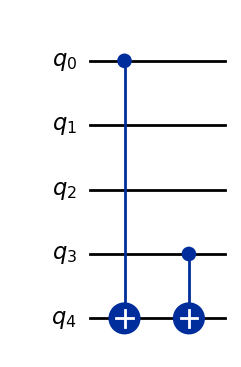

In [35]:
def bv_function(s):
    """
    Create a Bernstein-Vazirani function from a string of 1s and 0s.
    """
    
    qc = QuantumCircuit(len(s) + 1)
    for index, bit in enumerate(reversed(s)):
        if bit == "1":
            qc.cx(index, len(s))
    return qc

display(bv_function("1001").draw("mpl"))

In [42]:
def compile_circuit(function: QuantumCircuit):
    """
    Compiles a circuit for use in the Deutsch-Jozsa algorithm.
    """
    n = function.num_qubits - 1
    qc = QuantumCircuit(n + 1, n)
    qc.x(n)
    qc.h(range(n + 1))
    qc.compose(function, inplace=True)
    qc.h(range(n))
    qc.measure(range(n), range(n))
    return qc

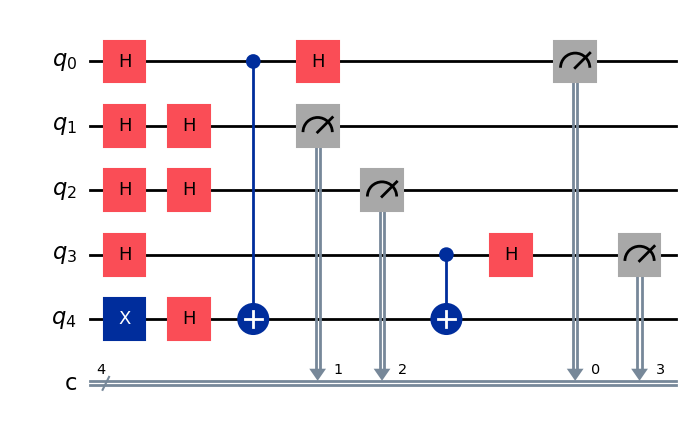

'1001'

In [43]:
def bv_algorithm(function: QuantumCircuit):
    qc = compile_circuit(function)
    display(qc.draw("mpl"))
    result = AerSimulator().run(qc, shots=1, memory=True).result()
    return result.get_memory()[0]

display(bv_algorithm(bv_function("1001")))